## Lab Semana 2

Considere el siguiente conjunto de datos:

https://www.kaggle.com/datasets/jockeroika/life-style-data?select=Final_data.csv


Instrucciones:

Crear un gráfico de barras y un gráfico de pastel para la variable “Workout_Type”.

Elaborar una tabla de frecuencias para la variable “Proteins”.
¿Qué gráfico usaría para representar la información proporcionada por la tabla?

Interpretar los resultados obtenidos.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('Final_data.csv')
df.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,...,cal_from_macros,pct_carbs,protein_per_kg,pct_HRR,pct_maxHR,cal_balance,lean_mass_kg,expected_burn,Burns Calories (per 30 min)_bc,Burns_Calories_Bin
0,34.91,Male,65.27,1.62,188.58,157.65,69.05,1.00,1080.90,Strength,...,2139.59,0.500432,1.624789,0.741237,0.835985,725.10,47.777394,685.1600,7.260425e+19,Medium
1,23.37,Female,56.41,1.55,179.43,131.75,73.18,1.37,1809.91,HIIT,...,1711.65,0.500850,1.514093,0.551247,0.734270,-232.91,40.809803,978.6184,1.020506e+20,High
2,33.20,Female,58.98,1.67,175.04,123.95,54.96,0.91,802.26,Cardio,...,1965.92,0.500610,1.663445,0.574534,0.708124,805.74,44.635580,654.5266,1.079607e+20,High
3,38.69,Female,93.78,1.70,191.21,155.10,50.07,1.10,1450.79,HIIT,...,1627.28,0.499533,0.862017,0.744155,0.811150,1206.21,63.007432,773.6300,8.987921e+19,High
4,45.09,Male,52.42,1.88,193.58,152.88,70.84,1.08,1166.40,Strength,...,2659.23,0.500581,2.538153,0.668405,0.789751,303.60,43.347504,711.4176,5.264685e+19,Low


In [2]:
df = pd.read_csv('Final_data.csv')

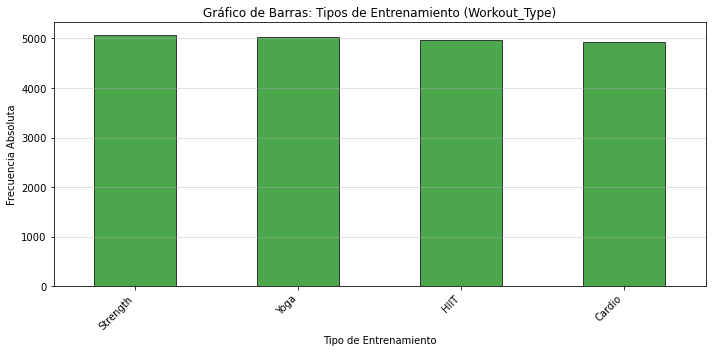

In [5]:
freq_workout = df['Workout_Type'].value_counts()

plt.figure(figsize=(10, 5))
freq_workout.plot(kind='bar', color='green', edgecolor='black', alpha=0.7)

plt.title('Gráfico de Barras: Tipos de Entrenamiento (Workout_Type)')
plt.xlabel('Tipo de Entrenamiento')
plt.ylabel('Frecuencia Absoluta')

plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.5)
plt.tight_layout()
plt.show()


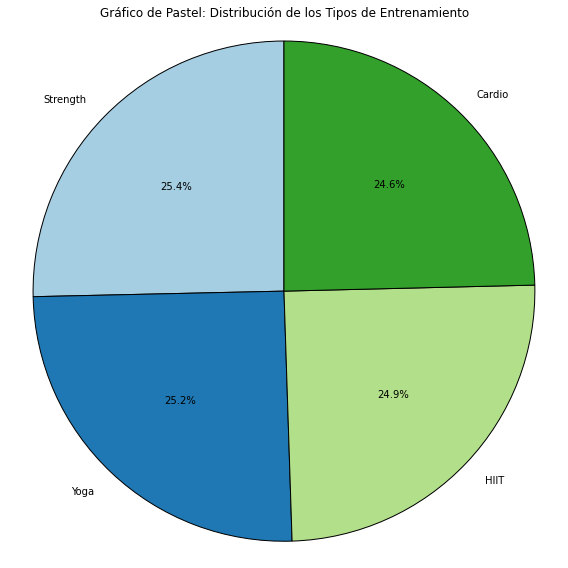

In [6]:
plt.figure(figsize=(8, 8))
percent_workout = freq_workout / freq_workout.sum() * 100

plt.pie(
    percent_workout, 
    labels=freq_workout.index, 
    autopct='%1.1f%%', 
    startangle=90, 
    colors=plt.cm.Paired.colors, 
    wedgeprops={'edgecolor': 'black'}
)

plt.title('Gráfico de Pastel: Distribución de los Tipos de Entrenamiento')
plt.axis('equal')
plt.tight_layout()
plt.show()


In [10]:
var_proteinas = 'Proteins'

min_proteins = df[var_proteinas].min()
max_proteins = df[var_proteinas].max()

n = len(df)
k = int(np.ceil(1 + 3.322 * np.log10(n)))
NUM_BINS_P = k

bin_edges_proteins = np.linspace(min_proteins, max_proteins, NUM_BINS_P + 1)

counts_proteins, _ = np.histogram(df[var_proteinas], bins=bin_edges_proteins)

tabela_proteinas = pd.DataFrame({
    'Límite inferior (g)': bin_edges_proteins[:-1].round(2),
    'Límite superior (g)': bin_edges_proteins[1:].round(2),
    'Frecuencia absoluta': counts_proteins
})

tabela_proteinas['Punto medio (g)'] = (tabela_proteinas['Límite inferior (g)'] + tabela_proteinas['Límite superior (g)']) / 2

tabela_proteinas['Frecuencia relativa (%)'] = (tabela_proteinas['Frecuencia absoluta'] / n * 100).round(2)
tabela_proteinas['Frecuencia acumulada'] = tabela_proteinas['Frecuencia absoluta'].cumsum()

tabela_proteinas


,Límite inferior (g),Límite superior (g),Frecuencia absoluta,Punto medio (g),Frecuencia relativa (%),Frecuencia acumulada
0,55.17,63.31,226,59.240,1.13,226
1,63.31,71.44,1143,67.375,5.72,1369
2,71.44,79.58,2126,75.510,10.63,3495
3,79.58,87.71,3403,83.645,17.02,6898
4,87.71,95.85,2648,91.780,13.24,9546
5,95.85,103.98,2869,99.915,14.34,12415
6,103.98,112.12,2031,108.050,10.15,14446
7,112.12,120.26,2132,116.190,10.66,16578
8,120.26,128.39,1674,124.325,8.37,18252
9,128.39,136.53,625,132.460,3.12,18877


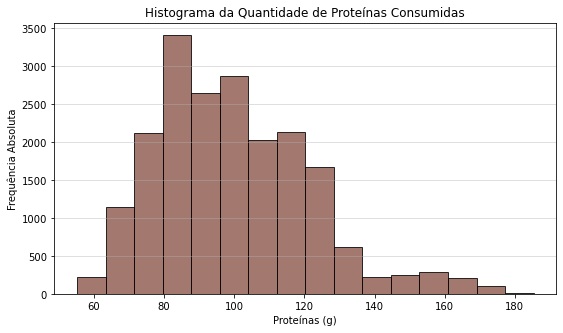

In [11]:
plt.figure(figsize=(9, 5))
plt.hist(df[var_proteinas], bins=bin_edges_proteins, color='#8c564b', edgecolor='black', alpha=0.8)
plt.title(f'Histograma da Quantidade de Proteínas Consumidas')
plt.xlabel('Proteínas (g)')
plt.ylabel('Frequência Absoluta')
plt.grid(axis='y', alpha=0.5)
plt.show()

1. Interpretación de 'Workout_Type' (gráficos de barras y de pastel):

   - Los gráficos de barras y de pastel muestran la distribución de los tipos de entrenamiento.

   - El tipo de entrenamiento 'Strength' es claramente el más frecuente, 
      representando 25.4% de la muestra.

   - El tipo de entrenamiento 'Cardio' es el menos común. Esta variable 
      es cualitativa nominal, y la interpretación se basa en la simple comparación de la frecuencia 
      de cada categoría.

2. Interpretación de 'Proteins' (tabla e histograma):

   - Forma: El histograma de Proteins muestra una distribución que tiende a ser 
      simétrica o ligeramente asimétrica.
